In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

PROBLEM 1

In [3]:
def binary_bandit(out):
    return int(random.random() < out)


In [4]:
class Bandit:
    def __init__(self, N):
        self.N = N
    
    def actions(self):
        return list(range(self.N))


In [5]:
bandit = Bandit(N=2)

In [6]:
def e_greedy(my_bandit, epsilon, max_iteration, p):
    Q = [0] * my_bandit.N 
    count = [0] * my_bandit.N
    r = 0
    R = []
    R_avg = [0]
    max_iter = max_iteration
    
    for iter in range(1, max_iter):
        if random.random() > epsilon:
            action = Q.index(max(Q)) # Exploit/ Greed
        else:
            action = random.choice(my_bandit.actions()) # Explore
            
        r = binary_bandit(p[action])
        R.append(r)
        count[action] += 1
        Q[action] += (r - Q[action]) / count[action]
        R_avg.append(R_avg[iter-1] + (r - R_avg[iter-1]) / iter)

    return Q, R_avg, R


Text(0.5, 1.0, 'average rewards acculumated over time')

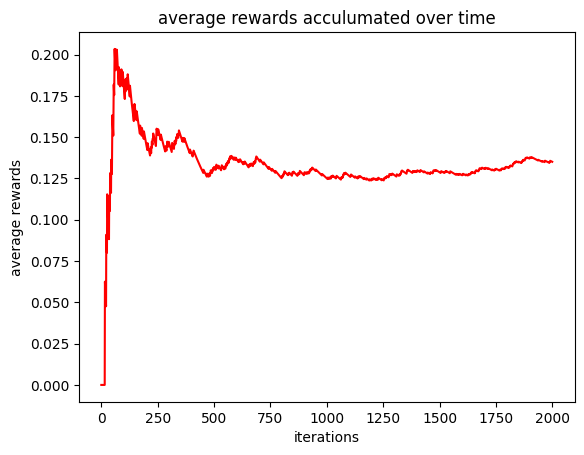

In [8]:
p=[0.1, 0.15]
Q, R_avg, R = e_greedy(bandit, 0.2, 2000,p)
plt.plot(R_avg, color='red') 
plt.xlabel("iterations")
plt.ylabel("average rewards")
plt.title("average rewards acculumated over time")

Text(0.5, 1.0, 'average rewards acculumated over time')

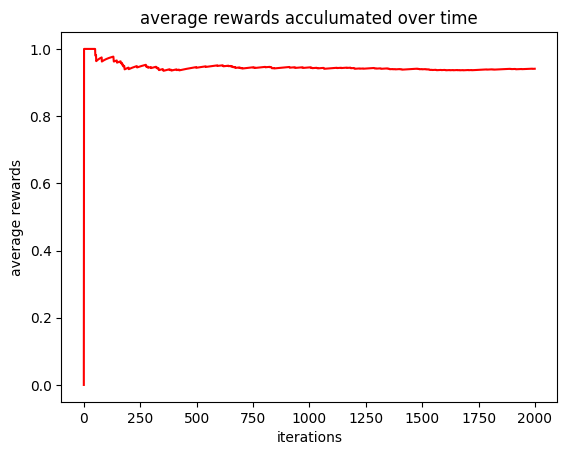

In [9]:
p=[0.95, 0.9]
Q, R_avg_2, R = e_greedy(bandit, 0.2, 2000,p)
plt.plot(R_avg_2,color='red');
plt.xlabel("iterations")
plt.ylabel("average rewards")
plt.title("average rewards acculumated over time")

PART B


In [10]:
# --- Bandit ---
class Bandit(object):
    def __init__(self, N):
        self.N = N
        expRewards = np.array([10]*self.N)
        self.expRewards = expRewards
        
    def actions(self):
        result = []
        for i in range(0,self.N):
            result.append(i)
            return result
        
    def increment_reward(self):
        incArray = np.random.normal(0,0.01,10)
        self.expRewards = self.expRewards + incArray
        
    def reward(self, action):
        result = []
        n = random.gauss(0,1)
        result = self.expRewards[action]
        return result

In [11]:
def e_greedy_3(bandit, epsilon, max_iteration):
    # Initialization
    q = [0] * bandit.N
    count = [0] * bandit.N
    r_avg = [0]
    r_sum = 0
    R = []
    r=0
    # Incremental Implementation
    for i in range(1, max_iteration+1):
        if random.random() < epsilon:
            # Explore
            action = random.choice(bandit.actions())
        else:
            # Exploit/ Greed
            action = q.index(max(q))
        
        reward = bandit.reward(action)
        r = myBandit.reward(action)
        R.append(r)
        bandit.increment_reward()
        r_sum += reward
        r_avg.append(r_sum / i)
        
        count[action] += 1
        q[action] += (reward - q[action]) / count[action]

    return q, r_avg,R


In [12]:
myBandit = Bandit(N=10)

Text(0.5, 1.0, 'instantaneous rewards given by environment')

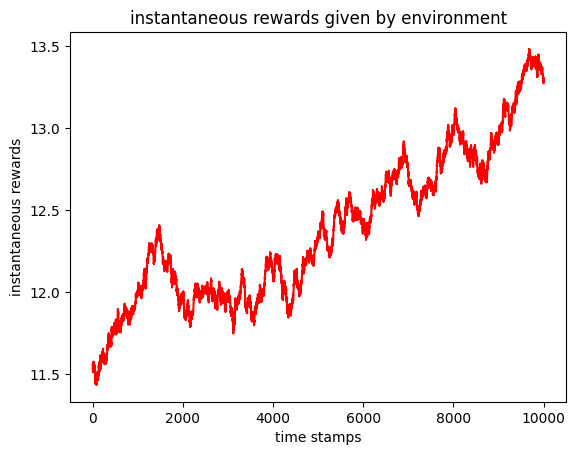

In [21]:
Q_,r_avg,R = e_greedy_3(myBandit, 0.2, 10000)
plt.plot(R,color='red');
plt.xlabel("time stamps")
plt.ylabel("instantaneous rewards")
plt.title("instantaneous rewards given by environment")

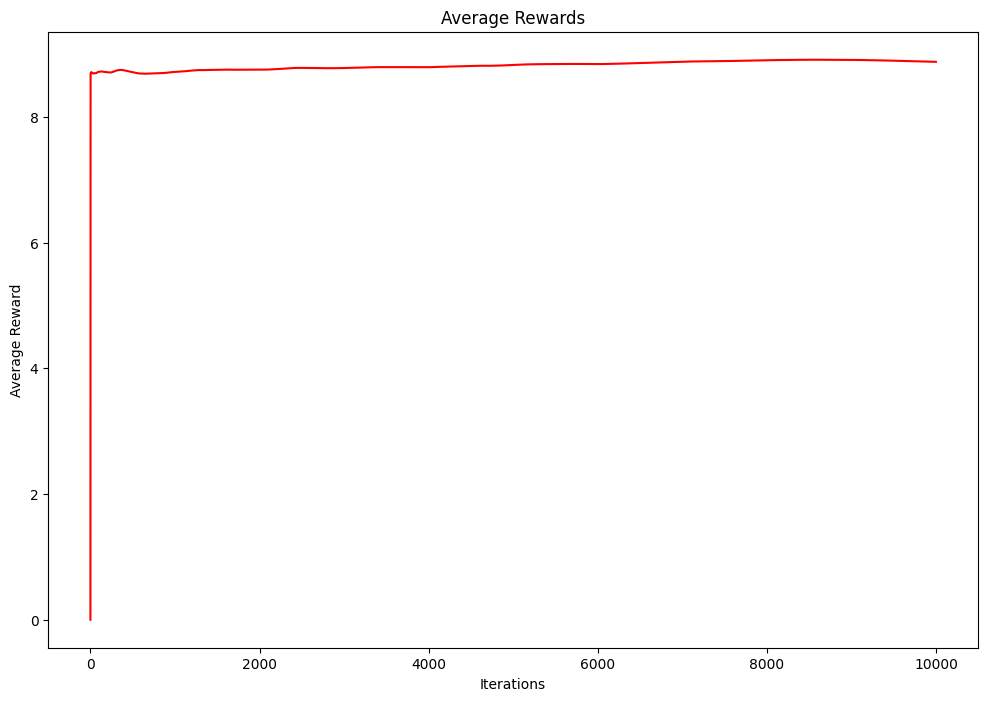

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(r_avg,color='red')
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Rewards")
plt.show()


PROBLEM 3



In [16]:
def e_greedy2(my_bandit, epsilon, alpha, max_iteration):
    Q = [0] * my_bandit.N 
    count = [0] * my_bandit.N
    R_avg = [0]
    r = 0
    R = []
    for i in range(1, max_iteration+1):
        if random.random() < epsilon:
            action = random.choice(my_bandit.actions())
        else:
            action = Q.index(max(Q))
        reward = my_bandit.reward(action)
        my_bandit.increment_reward()
        r = myBandit.reward(action)
        R.append(r)
        count[action] += 1
        Q[action] += alpha * (reward - Q[action])
        R_avg.append(R_avg[-1] + (reward - R_avg[-1]) / i)
    return Q, R_avg,R


Text(0.5, 1.0, 'average rewards')

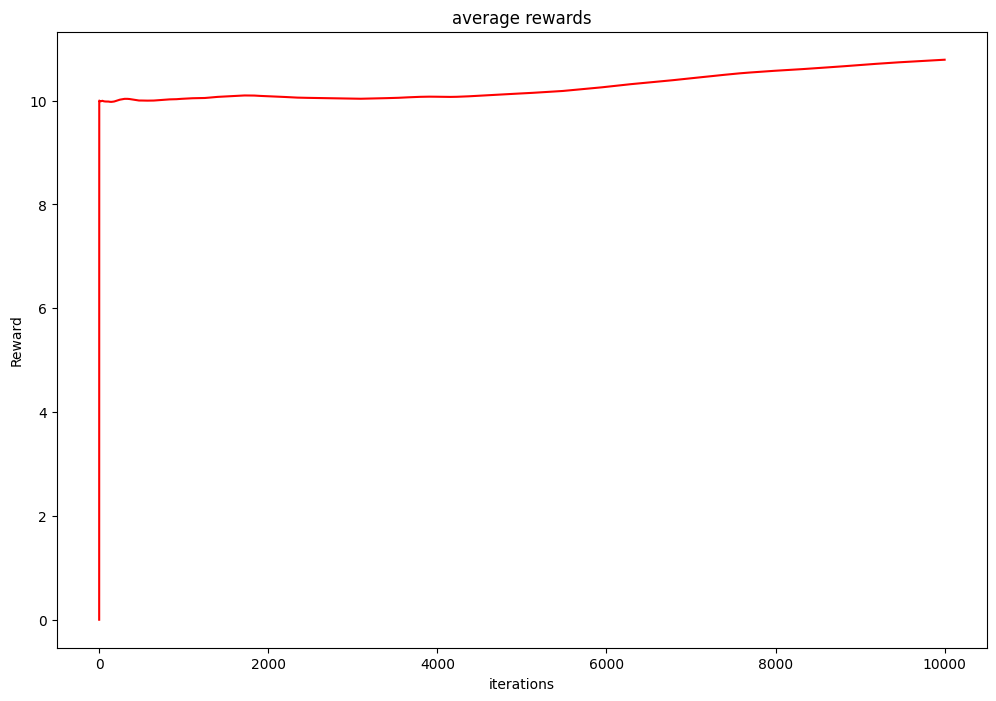

In [18]:
myBandit = Bandit(N=10)
Q,R_avg, R = e_greedy2(myBandit, 0.4, 0.1, 10000)
plt.figure(figsize=(12,8))
plt.plot(R_avg,color='red');
plt.xlabel("iterations")
plt.ylabel("Reward")
plt.title("average rewards")



Text(0, 0.5, 'rewards')

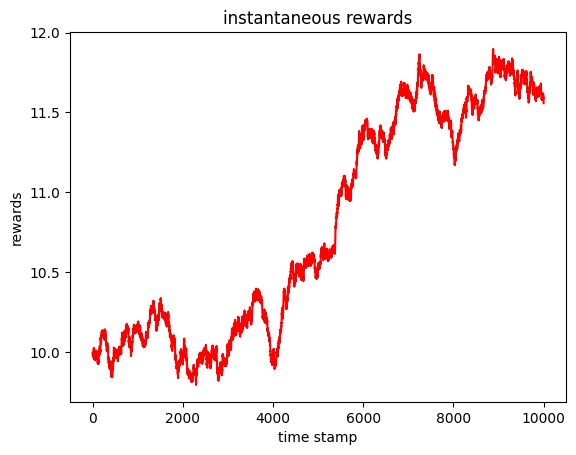

In [20]:
plt.plot(R,color='red');
plt.title("instantaneous rewards")
plt.xlabel("time stamp")
plt.ylabel("rewards")